In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
from numpy import absolute
from numpy import mean, std
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
train_df = pd.read_csv('training_data.csv')
train_df

,Open(t-4),Open(t-3),Open(t-2),Open(t-1),Open(t),High(t-4),High(t-3),High(t-2),High(t-1),High(t),...,reddit_sentiment(t-1),reddit_sentiment(t),twitter_sentiment(t-4),twitter_sentiment(t-3),twitter_sentiment(t-2),twitter_sentiment(t-1),twitter_sentiment(t),roe,infl,Close_x1(t+1)
0,37.644700,41.646481,41.157286,41.062921,42.030764,41.357371,42.299392,41.733146,42.553387,43.008279,...,0.000000,0.000000,0.127374,0.256366,0.244529,0.207746,0.318402,0.109210,0.190660,43.286526
1,41.646481,41.157286,41.062921,42.030764,42.570328,42.299392,41.733146,42.553387,43.008279,43.339757,...,0.000000,0.000000,0.256366,0.244529,0.207746,0.318402,0.206934,0.109210,0.237069,45.493195
2,41.157286,41.062921,42.030764,42.570328,43.552680,41.733146,42.553387,43.008279,43.339757,45.582718,...,0.000000,0.000000,0.244529,0.207746,0.318402,0.206934,0.247462,0.109210,0.283478,45.667412
3,41.062921,42.030764,42.570328,43.552680,45.573048,42.553387,43.008279,43.339757,45.582718,47.832947,...,0.000000,0.000000,0.207746,0.318402,0.206934,0.247462,0.230397,0.109210,0.329887,46.272312
4,42.030764,42.570328,43.552680,45.573048,46.373935,43.008279,43.339757,45.582718,47.832947,46.669125,...,0.000000,0.000000,0.318402,0.206934,0.247462,0.230397,0.148224,0.109210,0.376296,48.416073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,149.613005,154.587129,140.195943,151.987936,147.904180,156.999459,154.955949,150.050891,153.355842,151.598536,...,0.000000,0.000000,0.170015,0.066024,0.093421,0.091963,0.043767,0.504836,0.367535,146.406464
196,154.587129,140.195943,151.987936,147.904180,144.070019,154.955949,150.050891,153.355842,151.598536,150.689917,...,0.000000,0.152096,0.066024,0.093421,0.091963,0.043767,0.068209,0.528813,0.304319,144.269730
197,140.195943,151.987936,147.904180,144.070019,146.845798,150.050891,153.355842,151.598536,150.689917,147.075443,...,0.152096,0.158785,0.093421,0.091963,0.043767,0.068209,0.222123,0.528813,0.202989,132.168198
198,151.987936,147.904180,144.070019,146.845798,149.272088,153.355842,151.598536,150.689917,147.075443,149.741373,...,0.158785,0.000000,0.091963,0.043767,0.068209,0.222123,0.105450,0.528813,0.101658,131.658981


In [3]:
train_df.columns

Index(['Open(t-4)', 'Open(t-3)', 'Open(t-2)', 'Open(t-1)', 'Open(t)',
       'High(t-4)', 'High(t-3)', 'High(t-2)', 'High(t-1)', 'High(t)',
       'Low(t-4)', 'Low(t-3)', 'Low(t-2)', 'Low(t-1)', 'Low(t)',
       'Close_x(t-4)', 'Close_x(t-3)', 'Close_x(t-2)', 'Close_x(t-1)',
       'Close_x(t)', 'Close_y(t-4)', 'Close_y(t-3)', 'Close_y(t-2)',
       'Close_y(t-1)', 'Close_y(t)', 'Volume(t-4)', 'Volume(t-3)',
       'Volume(t-2)', 'Volume(t-1)', 'Volume(t)', 'Average_Likes(t-4)',
       'Average_Likes(t-3)', 'Average_Likes(t-2)', 'Average_Likes(t-1)',
       'Average_Likes(t)', 'Tweets_Volume(t-4)', 'Tweets_Volume(t-3)',
       'Tweets_Volume(t-2)', 'Tweets_Volume(t-1)', 'Tweets_Volume(t)',
       'reddit_sentiment(t-4)', 'reddit_sentiment(t-3)',
       'reddit_sentiment(t-2)', 'reddit_sentiment(t-1)', 'reddit_sentiment(t)',
       'twitter_sentiment(t-4)', 'twitter_sentiment(t-3)',
       'twitter_sentiment(t-2)', 'twitter_sentiment(t-1)',
       'twitter_sentiment(t)', 'roe', 'infl', 

# Preprocessing

### Generate Column Ordering

In [4]:
# time series columns
cols_series = ['Open', 'High', 'Low', 'Close_x', 'Close_y', 'Volume', 'Average_Likes', 'Tweets_Volume','reddit_sentiment', 'twitter_sentiment' ]
# uni value columns
cols_unival = ['roe', 'infl', 'Close_x1(t+1)']

In [5]:
col_order = ['High(t-4)', 'High(t-3)', 'High(t-2)', 'High(t-1)', 'High(t)', 'Low(t-4)', 'Low(t-3)','Low(t-2)',
            'Low(t-1)', 'Low(t)', 'Close_x(t-4)', 'Close_x(t-3)', 'Close_x(t-2)', 'Close_x(t-1)', 'Close_x(t)',
            'Close_y(t-4)', 'Close_y(t-3)', 'Close_y(t-2)', 'Close_y(t-1)', 'Close_y(t)', 'reddit_sentiment(t-4)',
            'reddit_sentiment(t-3)', 'reddit_sentiment(t-2)', 'reddit_sentiment(t-1)', 'reddit_sentiment(t)',
            'twitter_sentiment(t-4)', 'twitter_sentiment(t-3)', 'twitter_sentiment(t-2)', 'twitter_sentiment(t-1)',
            'twitter_sentiment(t)', 'roe', 'debtToEquity', 'ev/ebitda', 'eps', 'Close_x1(t+1)']

In [6]:
col_order = []
cur = pd.Series(train_df.columns)

for col in cols_series:
    filtered = list(cur[cur.str.startswith(col)])
    if (col == 'Close_x'):
        filtered.remove('Close_x1(t+1)')
    col_order.extend(filtered)

col_order.extend(cols_unival)

In [7]:
col_order

['Open(t-4)',
 'Open(t-3)',
 'Open(t-2)',
 'Open(t-1)',
 'Open(t)',
 'High(t-4)',
 'High(t-3)',
 'High(t-2)',
 'High(t-1)',
 'High(t)',
 'Low(t-4)',
 'Low(t-3)',
 'Low(t-2)',
 'Low(t-1)',
 'Low(t)',
 'Close_x(t-4)',
 'Close_x(t-3)',
 'Close_x(t-2)',
 'Close_x(t-1)',
 'Close_x(t)',
 'Close_y(t-4)',
 'Close_y(t-3)',
 'Close_y(t-2)',
 'Close_y(t-1)',
 'Close_y(t)',
 'Volume(t-4)',
 'Volume(t-3)',
 'Volume(t-2)',
 'Volume(t-1)',
 'Volume(t)',
 'Average_Likes(t-4)',
 'Average_Likes(t-3)',
 'Average_Likes(t-2)',
 'Average_Likes(t-1)',
 'Average_Likes(t)',
 'Tweets_Volume(t-4)',
 'Tweets_Volume(t-3)',
 'Tweets_Volume(t-2)',
 'Tweets_Volume(t-1)',
 'Tweets_Volume(t)',
 'reddit_sentiment(t-4)',
 'reddit_sentiment(t-3)',
 'reddit_sentiment(t-2)',
 'reddit_sentiment(t-1)',
 'reddit_sentiment(t)',
 'twitter_sentiment(t-4)',
 'twitter_sentiment(t-3)',
 'twitter_sentiment(t-2)',
 'twitter_sentiment(t-1)',
 'twitter_sentiment(t)',
 'roe',
 'infl',
 'Close_x1(t+1)']

In [8]:
# Order the dataframe columns for scaling
train_df = train_df[col_order]

In [9]:
train_scaled = train_df.copy()

In [10]:
train_scaled.columns

Index(['Open(t-4)', 'Open(t-3)', 'Open(t-2)', 'Open(t-1)', 'Open(t)',
       'High(t-4)', 'High(t-3)', 'High(t-2)', 'High(t-1)', 'High(t)',
       'Low(t-4)', 'Low(t-3)', 'Low(t-2)', 'Low(t-1)', 'Low(t)',
       'Close_x(t-4)', 'Close_x(t-3)', 'Close_x(t-2)', 'Close_x(t-1)',
       'Close_x(t)', 'Close_y(t-4)', 'Close_y(t-3)', 'Close_y(t-2)',
       'Close_y(t-1)', 'Close_y(t)', 'Volume(t-4)', 'Volume(t-3)',
       'Volume(t-2)', 'Volume(t-1)', 'Volume(t)', 'Average_Likes(t-4)',
       'Average_Likes(t-3)', 'Average_Likes(t-2)', 'Average_Likes(t-1)',
       'Average_Likes(t)', 'Tweets_Volume(t-4)', 'Tweets_Volume(t-3)',
       'Tweets_Volume(t-2)', 'Tweets_Volume(t-1)', 'Tweets_Volume(t)',
       'reddit_sentiment(t-4)', 'reddit_sentiment(t-3)',
       'reddit_sentiment(t-2)', 'reddit_sentiment(t-1)', 'reddit_sentiment(t)',
       'twitter_sentiment(t-4)', 'twitter_sentiment(t-3)',
       'twitter_sentiment(t-2)', 'twitter_sentiment(t-1)',
       'twitter_sentiment(t)', 'roe', 'infl', 

In [11]:
# transformation dictionary to store each row's minimum value and range (max-min)
trform_list = {}

In [12]:
def minmaxscaler(index, row, in_size, num_var):
    trform_dict = {}
    trformed_row = []
    value = 0
    for i in range(num_var):
        cur = np.array(row[ i*in_size : (i+1)*in_size ])
        rowmaxmin = cur.max() - cur.min()
        print('rowmaxmin', rowmaxmin)
        rowmin = cur.min()
        print('rowmin', rowmin)
        trform_dict[i] = [rowmaxmin, rowmin]
        trform_list[index] = trform_dict
        cur = [ (x - rowmin) / (rowmaxmin) for x in cur]
        trformed_row.extend(cur)
        if (i == 3):
            target = row[-1]
            value = (target - rowmin) / rowmaxmin
    
    rest = np.array(row[ num_var*in_size : -1 ])
    trformed_row.extend(rest)
    trformed_row.append(value)
    return trformed_row

In [13]:
for index, row in train_scaled.iterrows():
    trformed_row = minmaxscaler(index, row, 5, 8)
    train_scaled.loc[index] = trformed_row

rowmaxmin 4.386064828000329
rowmin 37.64469954219178
rowmaxmin 1.65090734192961
rowmin 41.35737127213854
rowmaxmin 4.66452364174642
rowmin 37.129117884311526
rowmaxmin 1.72845458984375
rowmin 40.82010269165039
rowmaxmin 86.31005859375
rowmin 2709.800048828125
rowmaxmin 465456000.0
rowmin 364944800.0
rowmaxmin 1.5851742151109245
rowmin 1.0555014605647517
rowmaxmin 2621.0
rowmin 4779.0
rowmaxmin 1.5074074219748042
rowmin 41.0629207043366
rowmaxmin 1.6066107300115746
rowmin 41.73314634803784
rowmaxmin 1.2168728441418253
rowmin 40.57676868191612
rowmaxmin 2.4664230346679688
rowmin 40.82010269165039
rowmaxmin 86.31005859375
rowmin 2709.800048828125
rowmaxmin 198640400.0
rowmin 364944800.0
rowmaxmin 0.24155930113495705
rowmin 0.864529838852488
rowmaxmin 868.0
rowmin 4779.0
rowmaxmin 2.4897590017422218
rowmin 41.0629207043366
rowmaxmin 3.8495720033273955
rowmin 41.73314634803784
rowmaxmin 2.417169543947253
rowmin 40.98307460171824
rowmaxmin 4.25848388671875
rowmin 41.234710693359375
rowmaxmin

In [14]:
trform_list

{0: {0: [4.386064828000329, 37.64469954219178],
  1: [1.65090734192961, 41.35737127213854],
  2: [4.66452364174642, 37.129117884311526],
  3: [1.72845458984375, 40.82010269165039],
  4: [86.31005859375, 2709.800048828125],
  5: [465456000.0, 364944800.0],
  6: [1.5851742151109245, 1.0555014605647517],
  7: [2621.0, 4779.0]},
 1: {0: [1.5074074219748042, 41.0629207043366],
  1: [1.6066107300115746, 41.73314634803784],
  2: [1.2168728441418253, 40.57676868191612],
  3: [2.4664230346679688, 40.82010269165039],
  4: [86.31005859375, 2709.800048828125],
  5: [198640400.0, 364944800.0],
  6: [0.24155930113495705, 0.864529838852488],
  7: [868.0, 4779.0]},
 2: {0: [2.4897590017422218, 41.0629207043366],
  1: [3.8495720033273955, 41.73314634803784],
  2: [2.417169543947253, 40.98307460171824],
  3: [4.25848388671875, 41.234710693359375],
  4: [57.33984375, 2775.60009765625],
  5: [244424400.0, 364944800.0],
  6: [0.24155930113495705, 0.864529838852488],
  7: [2272.0, 4779.0]},
 3: {0: [4.51012

In [15]:
train_scaled

,Open(t-4),Open(t-3),Open(t-2),Open(t-1),Open(t),High(t-4),High(t-3),High(t-2),High(t-1),High(t),...,reddit_sentiment(t-1),reddit_sentiment(t),twitter_sentiment(t-4),twitter_sentiment(t-3),twitter_sentiment(t-2),twitter_sentiment(t-1),twitter_sentiment(t),roe,infl,Close_x1(t+1)
0,0.000000,0.912385,0.800851,0.779337,1.000000,0.000000,0.570608,0.227617,0.724460,1.000000,...,0.000000,0.000000,0.127374,0.256366,0.244529,0.207746,0.318402,0.109210,0.190660,1.426953
1,0.387128,0.062601,0.000000,0.642058,1.000000,0.352448,0.000000,0.510541,0.793678,1.000000,...,0.000000,0.000000,0.256366,0.244529,0.207746,0.318402,0.206934,0.109210,0.237069,1.894684
2,0.037901,0.000000,0.388730,0.605443,1.000000,0.000000,0.213073,0.331240,0.417348,1.000000,...,0.000000,0.000000,0.244529,0.207746,0.318402,0.206934,0.247462,0.109210,0.283478,1.040911
3,0.000000,0.214593,0.334227,0.552037,1.000000,0.000000,0.086161,0.148946,0.573785,1.000000,...,0.000000,0.000000,0.207746,0.318402,0.206934,0.247462,0.230397,0.109210,0.329887,1.172295
4,0.000000,0.124233,0.350416,0.815599,1.000000,0.000000,0.068705,0.533599,1.000000,0.758777,...,0.000000,0.000000,0.318402,0.206934,0.247462,0.230397,0.148224,0.109210,0.376296,1.575699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.654363,1.000000,0.000000,0.819390,0.535622,1.000000,0.705909,0.000000,0.475631,0.222729,...,0.000000,0.000000,0.170015,0.066024,0.093421,0.091963,0.043767,0.504836,0.367535,0.551543
196,1.000000,0.000000,0.819390,0.535622,0.269198,1.000000,0.000000,0.673784,0.315520,0.130279,...,0.000000,0.152096,0.066024,0.093421,0.091963,0.043767,0.068209,0.528813,0.304319,0.604801
197,0.000000,1.000000,0.653684,0.328535,0.563930,0.473767,1.000000,0.720192,0.575517,0.000000,...,0.152096,0.158785,0.093421,0.091963,0.043767,0.068209,0.222123,0.528813,0.202989,-2.918726
198,1.000000,0.484239,0.000000,0.350569,0.657000,1.000000,0.720192,0.575517,0.000000,0.424484,...,0.158785,0.000000,0.091963,0.043767,0.068209,0.222123,0.105450,0.528813,0.101658,-0.032608


# Training

In [16]:
score_df = pd.DataFrame(columns=['gs_cv', 'data', "MAE", "MSE", "RMSE", "R2"])

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_scaled.drop('Close_x1(t+1)',axis=1), train_scaled['Close_x1(t+1)'] ,
                                   random_state=88, 
                                   test_size=0.25, 
                                   shuffle=False)

In [18]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train, random_state=0)

In [19]:
x = train_scaled.drop("Close_x1(t+1)", axis=1)
y = train_scaled["Close_x1(t+1)"]

# Elasticnet without Grid Search

In [20]:
model = ElasticNet()
model.fit(X_train, y_train)

ElasticNet()

# Accuracy on Test Data (Last 50 Days)

In [21]:
pred = model.predict(X_test)
pred_trformed = [pred[x - y_test.index[0]] * trform_list[x][3][0] + trform_list[x][3][1] for x in y_test.index]
y_trformed =  [y_test[x] * trform_list[x][3][0] + trform_list[x][3][1] for x in y_test.index]

mae = mean_absolute_error(y_trformed, pred_trformed)
mse = mean_squared_error(y_trformed, pred_trformed)
rmse = mean_squared_error(y_trformed, pred_trformed, squared=False)
r2 = r2_score(y_trformed, pred_trformed)
score_df.loc[len(score_df)] = [False, 'test', mae, mse, rmse, r2]
    
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R-squared:', r2)   

Mean Absolute Error: 10.498475463129761
Mean Squared Error: 146.44783052518105
Root Mean Squared Error: 12.101563143874474
R-squared: 0.0647892566743038


<AxesSubplot:>

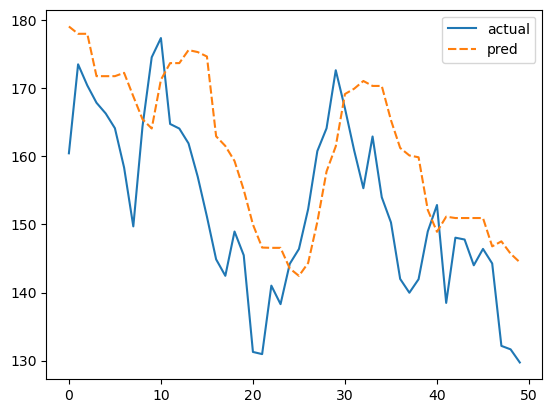

In [22]:
output = pd.DataFrame({'actual': np.array(y_trformed), 'pred': np.array(pred_trformed)})

sns.lineplot(data=output)

# Accuracy on the Complete Data (200 days)

In [23]:
validation_pred = model.predict(train_scaled.drop('Close_x1(t+1)',axis=1))
validation_y = train_scaled['Close_x1(t+1)']
v_pred_trformed = [ validation_pred[x] * trform_list[x][2][0] + trform_list[x][2][1] for x in validation_y.index ]
v_y_trformed = [ validation_y[x] * trform_list[x][2][0] + trform_list[x][2][1] for x in validation_y.index ]

mae = mean_absolute_error(v_y_trformed, v_pred_trformed)
mse = mean_squared_error(v_y_trformed, v_pred_trformed)
rmse = mean_squared_error(v_y_trformed, v_pred_trformed, squared=False)
r2 = r2_score(v_y_trformed, v_pred_trformed)
score_df.loc[len(score_df)] = [False, 'all', mae, mse, rmse, r2]
    
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R-squared:', r2)   

Mean Absolute Error: 6.358089362945714
Mean Squared Error: 91.84398968684576
Root Mean Squared Error: 9.583526996197474
R-squared: 0.942897151303942


<AxesSubplot:>

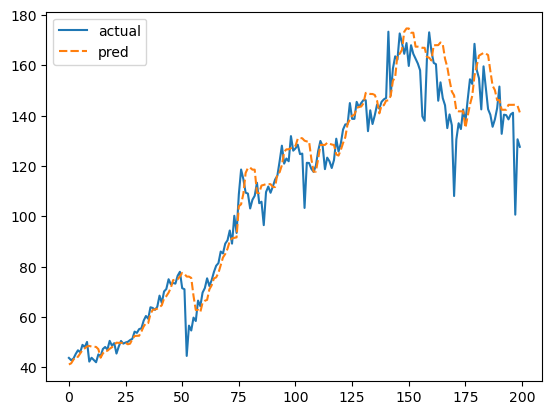

In [24]:
output = pd.DataFrame({'actual': v_y_trformed, 'pred': v_pred_trformed })
sns.lineplot(data=output)

# Elasticnet with gridsearch

In [25]:
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],
    'max_iter': [1000, 5000, 10000],
    'tol': [1e-3, 1e-4, 1e-5]
}

In [26]:
best_model = ElasticNet()
grid_search = GridSearchCV(estimator=best_model, param_grid=param_grid, cv=5, n_jobs = -1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_params

{'alpha': 0.1, 'l1_ratio': 0.5, 'max_iter': 1000, 'tol': 1e-05}

In [27]:
best_model = ElasticNet(alpha = 0.1, l1_ratio = 0.5, max_iter = 1000, tol = 1e-5)
best_model.fit(X_train, y_train)

ElasticNet(alpha=0.1, tol=1e-05)

In [28]:
pred = best_model.predict(X_test)
pred_trformed = [pred[x - y_test.index[0]] * trform_list[x][3][0] + trform_list[x][3][1] for x in y_test.index]
y_trformed =  [y_test[x] * trform_list[x][3][0] + trform_list[x][3][1] for x in y_test.index]

mae = mean_absolute_error(y_trformed, pred_trformed)
mse = mean_squared_error(y_trformed, pred_trformed)
rmse = mean_squared_error(y_trformed, pred_trformed, squared=False)
r2 = r2_score(y_trformed, pred_trformed)
score_df.loc[len(score_df)] = [True, 'test', mae, mse, rmse, r2]
    
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R-squared:', r2)   

Mean Absolute Error: 7.641982164844889
Mean Squared Error: 77.75357618850458
Root Mean Squared Error: 8.817798828988138
R-squared: 0.5034683714827763


<AxesSubplot:>

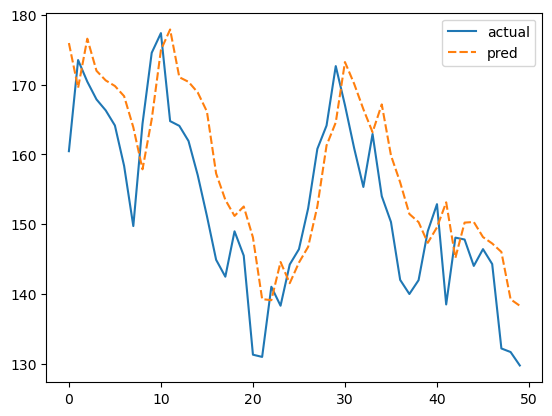

In [29]:
output = pd.DataFrame({'actual': np.array(y_trformed), 'pred': np.array(pred_trformed)})

sns.lineplot(data=output)

# Accuracy on the Complete Data (200 days)

In [30]:
validation_pred = best_model.predict(train_scaled.drop('Close_x1(t+1)',axis=1))
validation_y = train_scaled['Close_x1(t+1)']
v_pred_trformed = [ validation_pred[x] * trform_list[x][2][0] + trform_list[x][2][1] for x in validation_y.index ]
v_y_trformed = [ validation_y[x] * trform_list[x][2][0] + trform_list[x][2][1] for x in validation_y.index ]

mae = mean_absolute_error(v_y_trformed, v_pred_trformed)
mse = mean_squared_error(v_y_trformed, v_pred_trformed)
rmse = mean_squared_error(v_y_trformed, v_pred_trformed, squared=False)
r2 = r2_score(v_y_trformed, v_pred_trformed)
score_df.loc[len(score_df)] = [True, 'all', mae, mse, rmse, r2]
    
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R-squared:', r2)   

Mean Absolute Error: 4.7824023704283665
Mean Squared Error: 56.22768671355207
Root Mean Squared Error: 7.498512300020056
R-squared: 0.9650411409839574


<AxesSubplot:>

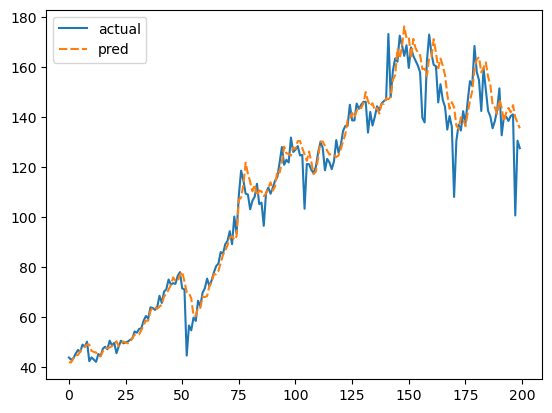

In [31]:
output = pd.DataFrame({'actual': v_y_trformed, 'pred': v_pred_trformed })
sns.lineplot(data=output)

In [32]:
score_df

,gs_cv,data,MAE,MSE,RMSE,R2
0,False,test,10.498475,146.447831,12.101563,0.064789
1,False,all,6.358089,91.843990,9.583527,0.942897
2,True,test,7.641982,77.753576,8.817799,0.503468
3,True,all,4.782402,56.227687,7.498512,0.965041
